# Question 2

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat # to be able to use .mat file in the python environment

In [2]:
data = loadmat('Xdata.mat')

In [3]:
x_data = data['x'].flatten()
print('The dataset:', x_data)

The dataset: [ 89.9  95.3 101.4  97.1 103.  104.   90.7  98.2  78.7 111.5  93.7  88.
  97.5  85.7  99.8  94.4 121.8 111.4  75.  104.4  86.   97.4 101.6 107.5
  97.3 115.8  95.2 103.3 106.6 100.9]


In [4]:
mean = np.mean(x_data)
median = np.median(x_data)
print('The sample mean and the sample median respectively: %f, %f' %
      (mean, median))

The sample mean and the sample median respectively: 98.436667, 97.850000


In [5]:
std = np.std(x_data)
q25, q75 = np.percentile(x_data, [25, 75])
iqr = q75 - q25
print('The sample standard deviation and the sample inter-quartile range respectively: %f, %f' %
      (std, iqr))

The sample standard deviation and the sample inter-quartile range respectively: 10.056523, 9.950000


In [6]:
x_range = [70, 130]
num_bins = [3, 6, 12]

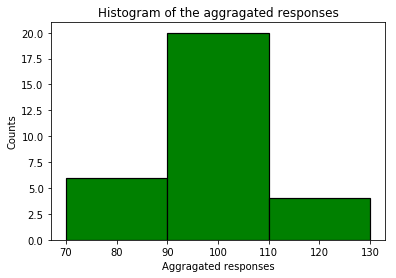

In [7]:
plt.title('Histogram of the aggragated responses')
plt.ylabel('Counts')
plt.xlabel('Aggragated responses')
hist_3bins = plt.hist(x_data.flatten(), bins=num_bins[0], range=x_range, 
                      color='g', edgecolor='black', linewidth=1.2)

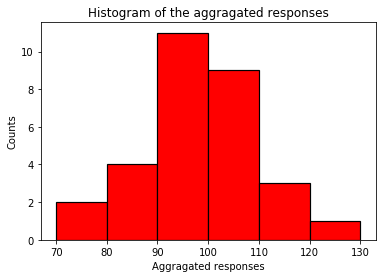

In [8]:
plt.title('Histogram of the aggragated responses')
plt.ylabel('Counts')
plt.xlabel('Aggragated responses')
hist_6bins = plt.hist(x_data, bins=num_bins[1], range=x_range,
                      color='r', edgecolor='black', linewidth=1.2)

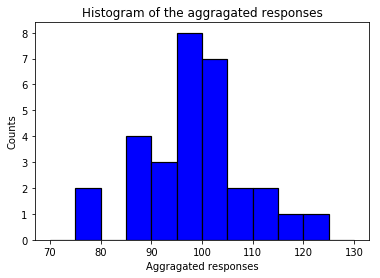

In [9]:
plt.title('Histogram of the aggragated responses')
plt.ylabel('Counts')
plt.xlabel('Aggragated responses')
hist_12bins = plt.hist(x_data, bins=num_bins[2], range=x_range, 
                       color='b', edgecolor='black', linewidth=1.2)

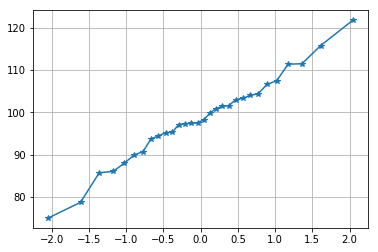

In [10]:
y = np.sort(x_data)
n = np.size(x_data)
f = (np.arange(1, n + 1) - 3/ 8) / (n + 1 / 4)
q = 4.91 * (f ** 0.14 - (1 - f) ** 0.14)
plt.grid()
plt.plot(q, y, '*-')

In [11]:
def bootstrap_resampling(data, bootstraps, stat_func):
    """
    Given the data, number of bootstrapping iterations and the statistic of 
    interest; this function returns a list of statistics obtained from each 
    bootstrapped sample of the original data.
    Args:
        data: The original data
        bootstraps: The number of bootstrapping iterations
        stat_func: The function to compute the statistic of interest 
            (e.g.: np.mean, np.std, etc.)
    Returns: 
        bootstrap_replicate: The mean of all bootstrap replicates
        standard_error: The standard error of the bootstrap replicate
        bootstrap_replicates: The list of statistics obtained from the 
            bootstrapped samples
    """
    bootstrap_replicates = []
    sample_size = np.size(data)
    for _ in range(bootstraps):
        bootstrap_sample = np.random.choice(data, sample_size, replace=True)
        bootstrap_replicates.append(stat_func(bootstrap_sample))
    return np.mean(bootstrap_replicates), np.std(bootstrap_replicates), bootstrap_replicates

In [12]:
def compute_confidence_interval(data, confidence):
    """
    Given the data and the confidence level, computes the confidence interval
    of the data samples.
    Args:
        data: The given data
        confidence: The confidence level, known as alpha (between 0 and 100)
    Returns:
        lower: The lowerbound of the confidence interval
        upper: The upperbound of the confidence interval
    """
    sorted_data = np.sort(data)
    lower = np.percentile(sorted_data, (100 - confidence) / 2)
    upper = np.percentile(sorted_data, confidence + (100 - confidence) / 2)
    return lower, upper

The sample mean computed from 1000 bootstrap samples: 98.391483
The bootstrapped estimate for the standard error of the mean: 1.798642756744345
The 95% confidence interval of the mean: (94.91608333333333, 101.98700000000001)
Overall, mean of the dataset can be reported as: 98.391 +- 1.799, (94.916, 101.987)


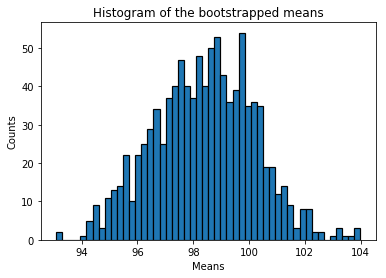

In [13]:
# Performing the bootstrap sampling and computing the bootstrap replicate 
# of the mean together with its standard error
bootstrap_mean, standard_error_mean, bootstrap_means = bootstrap_resampling(x_data, 
                                                                            1000, np.mean)
print('The sample mean computed from %s bootstrap samples: %f' % 
      (1000, bootstrap_mean))
print('The bootstrapped estimate for the standard error of the mean:',
      standard_error_mean)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(bootstrap_means, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the mean:', confidence_interval)

print('Overall, mean of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)' % 
     (bootstrap_mean, standard_error_mean, lower, upper))

# Plotting an histogram for the bootstrap distribution
plt.title('Histogram of the bootstrapped means')
plt.ylabel('Counts')
plt.xlabel('Means')
hist_means = plt.hist(bootstrap_means, bins=50, edgecolor='black', linewidth=1.2)

The sample standard deviation computed from 1000 bootstrap samples: 9.825083
The bootstrapped estimate for the standard error of the standard deviation: 1.3904032657864442
The 95% confidence interval of the standard deviation: (7.1006023270025205, 12.562138382235577)
Overall, standard deviation of the dataset can be reported as: 9.825 +- 1.390, (7.101, 12.562)


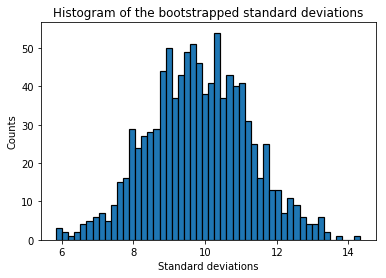

In [14]:
# Performing the bootstrap sampling and computing the bootstrap replicate of the
# standard deviation together with its standard error
bootstrap_std, standard_error_std, bootstrap_stds = bootstrap_resampling(x_data, 
                                                                         1000, np.std)
print('The sample standard deviation computed from %s bootstrap samples: %f' % 
      (1000, bootstrap_std))
print('The bootstrapped estimate for the standard error of the standard deviation:',
      standard_error_std)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(bootstrap_stds, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the standard deviation:', confidence_interval)

print('Overall, standard deviation of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)' % 
     (bootstrap_std, standard_error_std, lower, upper))

# Plotting an histogram for the bootstrap distribution
plt.title('Histogram of the bootstrapped standard deviations')
plt.ylabel('Counts')
plt.xlabel('Standard deviations')
hist_means = plt.hist(bootstrap_stds, bins=50, edgecolor='black', linewidth=1.2)

In [15]:
def jackknife_resampling(data, stat_func):
    """
    Given the data and the statistic of interest; this function returns a
    list of statistics obtained from each jacknifed sample of the original data.
    Args:
        data: The original data
        stat_func: The function to compute the statistic of interest 
            (e.g.: np.mean, np.std, etc.)
    Returns: 
        jackknife_replicate: The mean of all jackknife replicates
        standard_error: The standard error of the jackknife replicate
        jackknife_replicates: The list of statistics obtained from the 
            jackknifed samples
    """
    jackknife_replicates = []
    jackknifes = np.size(data)
    for i in range(jackknifes):
        jackknife_data = [elem for j, elem in enumerate(data) if i != j]
        jackknife_replicate_i = stat_func(jackknife_data)
        jackknife_replicates.append(jackknife_replicate_i)
    return np.mean(jackknife_replicates), np.std(jackknife_replicates), jackknife_replicates

The sample mean computed from jackknife samples: 98.43666666666667
The jackknifed estimate for the standard error of the mean: 0.3467766563828598
The 95% confidence interval of the mean: (97.78103448275863, 99.15232758620692)
Overall, mean of the dataset can be reported as: 98.437 +- 0.347, (97.781, 99.152)


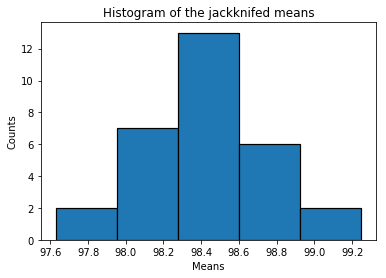

In [16]:
# Performing the jackknife sampling and computing the jackknife replicate 
# of the mean togerther with its standard error
jackknife_mean, standard_error_mean, jackknife_means = jackknife_resampling(x_data, np.mean)
print('The sample mean computed from jackknife samples:', jackknife_mean)
print('The jackknifed estimate for the standard error of the mean:',
      standard_error_mean)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(jackknife_means, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the mean:', confidence_interval)

print('Overall, mean of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)' % 
     (jackknife_mean, standard_error_mean, lower, upper))

# Plotting an histogram for the jackknife distribution
plt.title('Histogram of the jackknifed means')
plt.ylabel('Counts')
plt.xlabel('Means')
hist_means = plt.hist(jackknife_means, bins=5, edgecolor='black', linewidth=1.2)

The sample standard deviation computed from jackknife samples: 10.046791101023341
The jackknifed estimate for the standard error of the standard deviation: 0.27457253785040076
The 95% confidence interval of the standard deviation: (9.225836041965325, 10.22730576358885)
Overall, standard deviation of the dataset can be reported as: 10.047 +- 0.275, (9.226, 10.227)


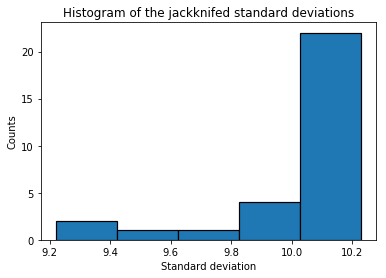

In [17]:
# Performing the jackknife sampling and computing the jackknife replicate 
# of the standard deviation togerther with its standard error
jackknife_std, standard_error_std, jackknife_stds = jackknife_resampling(x_data, np.std)
print('The sample standard deviation computed from jackknife samples:', jackknife_std)
print('The jackknifed estimate for the standard error of the standard deviation:',
      standard_error_std)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(jackknife_stds, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the standard deviation:', confidence_interval)

print('Overall, standard deviation of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)' % 
     (jackknife_std, standard_error_std, lower, upper))

# Plotting an histogram for the jackknife distribution
plt.title('Histogram of the jackknifed standard deviations')
plt.ylabel('Counts')
plt.xlabel('Standard deviation')
hist_means = plt.hist(jackknife_stds, bins=5, edgecolor='black', linewidth=1.2)